# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Ines

Apellidos: Saavedra Villafruela

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Análisis descriptivo


In [2]:
df = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")

In [3]:
df

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.30,0.3,1.6,796,1,2.000000,114.000000,305.000000,1,155.000000,0.900000,1,0,1,0,0
1,Centro,2011-01-01,15.60,-0.7,3.0,800,1,2.000000,114.000000,305.000000,1,155.000000,0.900000,1,0,1,0,0
2,Centro,2011-02-01,15.40,0.1,3.4,800,4,7.000000,184.000000,44.250000,4,100.000000,0.592500,3,0,4,0,0
3,Centro,2011-05-01,15.00,0.0,3.4,800,5,9.600000,61.000000,134.600000,11,264.400000,1.612000,4,1,4,0,0
4,Centro,2011-06-01,15.00,-0.1,3.0,800,5,5.400000,135.333333,129.200000,15,289.800000,1.768000,4,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,Barajas,2023-08-01,13.32,0.5,2.4,872,46,1.347826,87.136364,188.652174,208,229.543478,5.765870,30,22,20,0,4
2214,Barajas,2023-09-01,13.56,0.2,3.3,872,61,1.311475,70.491228,189.049180,387,198.245902,5.335738,40,40,18,0,3
2215,Barajas,2023-10-01,13.70,0.3,3.5,872,66,1.424242,75.064516,180.575758,538,185.590909,5.225000,43,41,21,0,4
2216,Barajas,2023-11-01,14.00,-0.3,3.3,872,59,1.372881,73.410714,172.016949,424,206.830508,6.065932,39,38,18,0,3


In [4]:
print("El tamaño de los datos es de las siguientes filas y columnas: ",df.shape)

El tamaño de los datos es de las siguientes filas y columnas:  (2218, 18)


In [6]:
print("El numero de NAs es:\n", df.isna().sum())

El numero de NAs es:
 neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_reviews        0
number_of_reviews      0
reviews_per_month      0
hosts_count            0
Private_room           0
Entire_home            0
Hotel_room             0
Shared_room            0
dtype: int64


no hay NAs en los datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  2218 non-null   object 
 1   date                 2218 non-null   object 
 2   m2_price             2218 non-null   float64
 3   inflation            2218 non-null   float64
 4   HICP                 2218 non-null   float64
 5   population_density   2218 non-null   int64  
 6   listings_count       2218 non-null   int64  
 7   minimum_nights       2218 non-null   float64
 8   nigth_price          2218 non-null   float64
 9   availability_365     2218 non-null   float64
 10  listing_reviews      2218 non-null   int64  
 11  number_of_reviews    2218 non-null   float64
 12  reviews_per_month    2218 non-null   float64
 13  hosts_count          2218 non-null   int64  
 14  Private_room         2218 non-null   int64  
 15  Entire_home          2218 non-null   i

Solo hay una variable categorica que es el Barrio, el resto, aunque son discretas y continuas, son todas cuantitativas asi que es bueno para el analiss de regresion que haremos luego

In [8]:
# Convert 'date' to datetime for time-series analysis
df['date'] = pd.to_datetime(df['date'])

exploracion de los datos

In [9]:
df['neighbourhood_group'].value_counts()

Centro                155
Retiro                139
Hortaleza             138
Chamberí              137
Salamanca             136
Arganzuela            134
Latina                131
Tetuán                129
Ciudad Lineal         122
Barajas               122
Chamartín             122
Carabanchel           121
Puente de Vallecas    118
Usera                 113
Villaverde            112
Moratalaz             108
Villa de Vallecas      91
Vicálvaro              90
Name: neighbourhood_group, dtype: int64

para hacer este ejercicio voy a basarme en hiptesis que van a ser: 
- probablemente dependiendo del barrio del que se trate, cambiará el precio del metro cuadrado

- ademas, en zonas en laas que haya mas poblacion, será mas caro el metro cuadrado 

- segun suba la inflacion, subira el precio del metro cuadrado

- dependerá de la estacion del año los precios 

- donde haya mas hosts seguramente suba el precio

1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?


In [10]:
avg_price_neighbourhood = df.groupby('neighbourhood_group')['m2_price'].mean().sort_values()

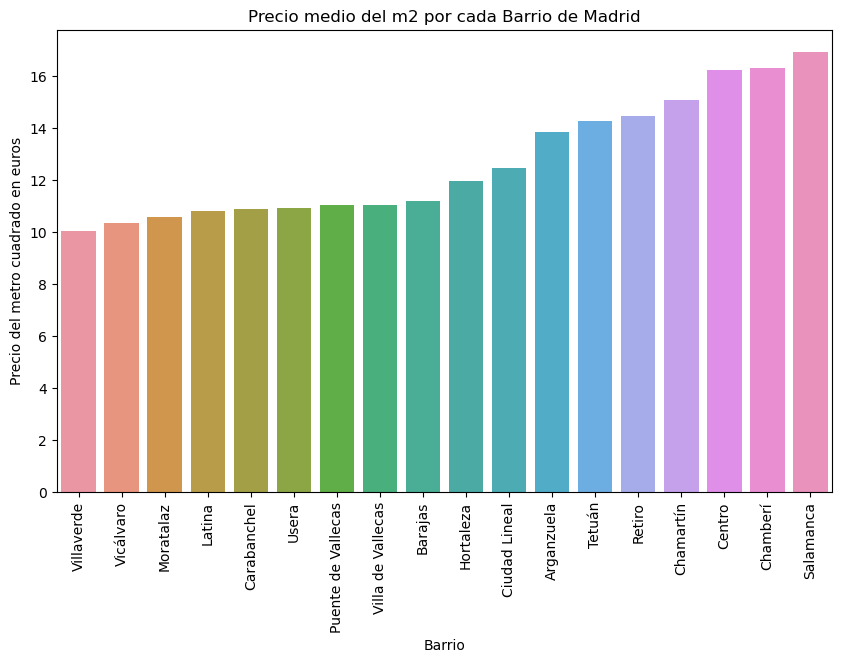

In [11]:
# 1. Average m2_price by neighbourhood_group


plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_neighbourhood.index, y=avg_price_neighbourhood.values)
plt.title('Precio medio del m2 por cada Barrio de Madrid')
plt.ylabel('Precio del metro cuadrado en euros')
plt.xlabel('Barrio')
plt.xticks(rotation=90)
plt.show()

en esta visualizacion se ve que villaverde es el barrio con el precio mas bajo y que salamanca es el barrio con el precio mas alto. Esto se debe a que el barrio de Salamanca es el barrio mas exclusivo de Madrid y que Villaverde, Vicalvaro o Moratalaz son zonas perifericas de la comunidad de marid

In [12]:

avg_price_time = df.groupby('date')['m2_price'].mean()
avg_price_time.value_counts

<bound method IndexOpsMixin.value_counts of date
2010-08-01    15.300000
2011-01-01    15.600000
2011-02-01    15.400000
2011-05-01    15.000000
2011-06-01    15.000000
                ...    
2023-08-01    15.497222
2023-09-01    15.719444
2023-10-01    15.967778
2023-11-01    16.164444
2023-12-01    16.416667
Name: m2_price, Length: 155, dtype: float64>

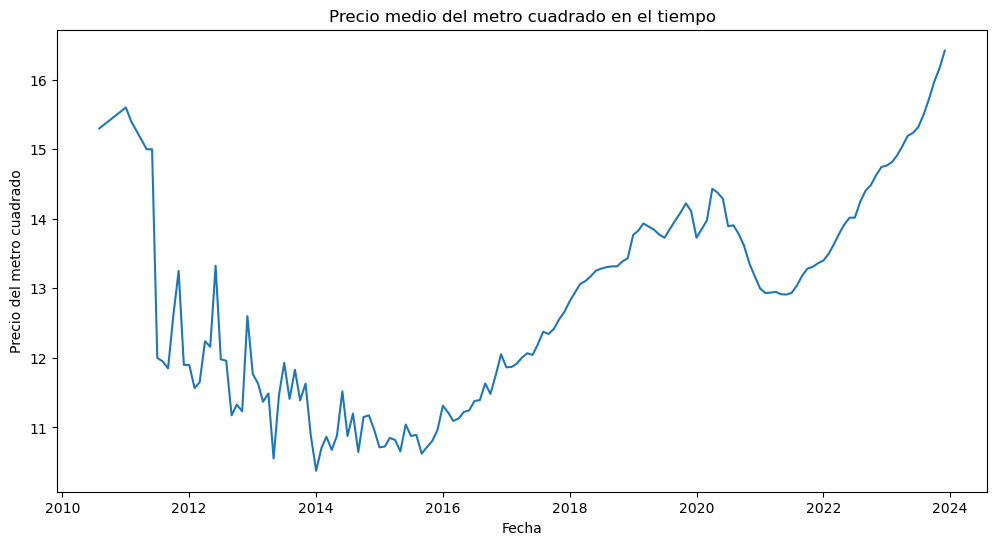

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(avg_price_time.index, avg_price_time.values)
plt.title('Precio medio del metro cuadrado en el tiempo')
plt.ylabel('Precio del metro cuadrado')
plt.xlabel('Fecha')
plt.show()


aqui se ve una caida en picado en 2011 que coincide con la burbuja inmobiliaria de despues de la crisis de 2009 y luego una bajada tambien despues del covid, pero una vez recuperado lo del covid, estan subiendo los precios mucho a unos niveles muy altos

2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?


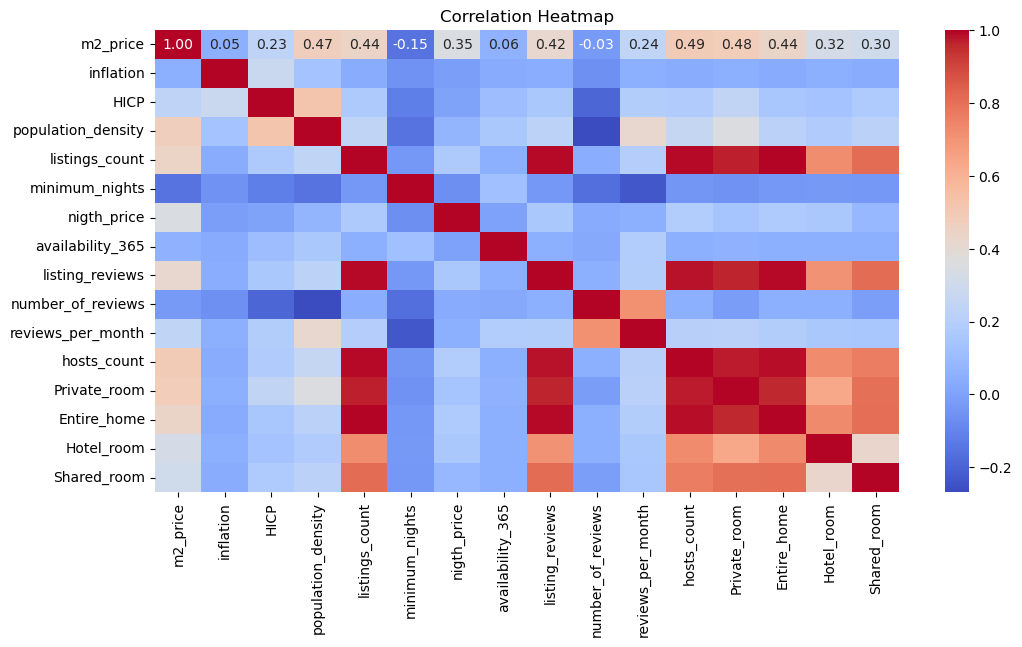

In [15]:
plt.figure(figsize=(12, 6))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Veindo esta visualizacion se pueden comprobar algunas de nuestras hipotesis: de aqui se observa que el precio del metro cuadrado esta correlado con la densidad de poblacion en esa zona, lo cual tiene sentido ya que donde haya más habitantes, tiene mas tendencia a precios altos. Tambien esta correlado con el numero de anfitriones o hosts (esto era una de las hipotesis) y si es una habitacion privada 


3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?


In [20]:
# Promedio mensual de reviews_per_month
monthly_reviews = df.groupby(df['date'].dt.month)['reviews_per_month'].mean()
monthly_reviews


date
1     1.858523
2     1.916475
3     1.855726
4     1.792505
5     1.867928
6     1.908917
7     1.863625
8     2.050415
9     1.864858
10    1.813551
11    1.946439
12    1.938247
Name: reviews_per_month, dtype: float64

In [21]:
# Promedio mensual de availability_365
monthly_availability = df.groupby(df['date'].dt.month)['availability_365'].mean()
monthly_availability

date
1     149.971388
2     151.017309
3     142.631535
4     150.455302
5     150.784080
6     150.890243
7     145.190803
8     145.411451
9     154.002765
10    147.889522
11    149.554065
12    149.634113
Name: availability_365, dtype: float64

Text(0, 0.5, 'Reseñas mensuales')

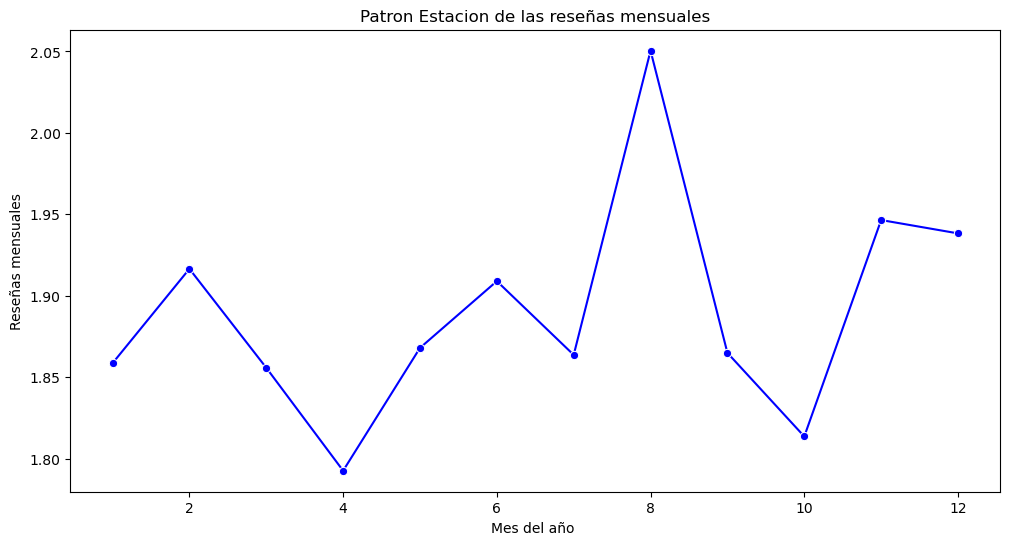

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_reviews.index, y=monthly_reviews.values, marker='o', linestyle='-', color='blue')

plt.title("Patron Estacion de las reseñas mensuales")
plt.xlabel("Mes del año ")
plt.ylabel("Reseñas mensuales")

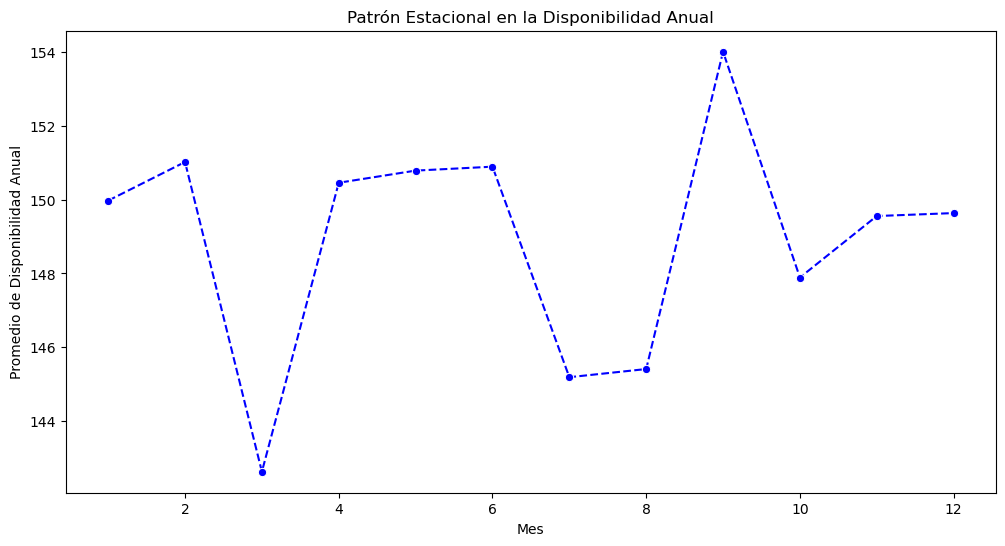

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_availability.index, y=monthly_availability.values, marker='o', linestyle='--', color='blue')
plt.title('Patrón Estacional en la Disponibilidad Anual')
plt.xlabel('Mes')
plt.ylabel('Promedio de Disponibilidad Anual')
plt.show()

- Reviews por mes: 

las reviews por mes tienen un pico en agosto, que coincide con la temporada alta de turismo

Las caidas son en abril y octubre, que reflejan temporadas menos turisticas 

- disponibilidad anual:

El pico de disponibilidad365 es en septiembre, que puede que ser que coincida con que se añaden despues del verano. 

La caida se observa en marzo que puede deberse a una alta ocupacion en ese mes o menos propiedades disponibles 

4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?


In [28]:
top_hosts = df.groupby('neighbourhood_group')['hosts_count'].sum().sort_values(ascending=False).head(10)


In [30]:
top_hosts

neighbourhood_group
Centro                93731
Arganzuela            11183
Salamanca             10644
Chamberí               9053
Retiro                 7563
Tetuán                 7164
Ciudad Lineal          5349
Carabanchel            5124
Puente de Vallecas     4712
Latina                 4570
Name: hosts_count, dtype: int64

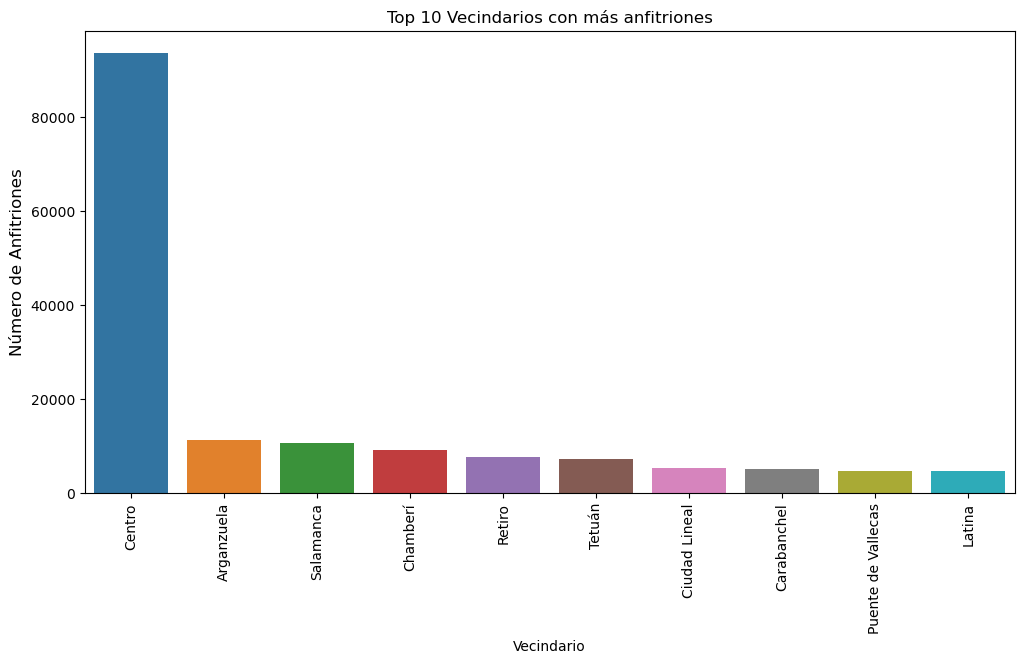

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values)
plt.title('Top 10 Vecindarios con más anfitriones')
plt.ylabel('Número de Anfitriones', fontsize=12)
plt.xlabel('Vecindario')
plt.xticks(rotation=90)
plt.show()

Aqui se ve que Centro destaca por el mayor numero de anfitriones, superando a los otros barrios. Otros barrios como Arganzuela, Salamanca o Chamberi tambien tienen anfitriones pero menos. Esto es muy posible que se deba a que la mayotia de turistas prefieren alojarse en el Centro de la ciudad por la comodidad que supone

In [ ]:
hosts_price_relation = df.groupby('neighbourhood_group')[['hosts_count', 'm2_price']].mean()

5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?



In [31]:
df['year'] = df['date'].dt.year

In [33]:
crecimiento = df.groupby(['neighbourhood_group', 'year'])[['m2_price', 'nigth_price']].mean().reset_index()
crecimiento


,neighbourhood_group,year,m2_price,nigth_price
0,Arganzuela,2012,11.400000,33.000000
1,Arganzuela,2013,11.163636,80.457576
2,Arganzuela,2014,11.058333,74.364012
3,Arganzuela,2015,11.575000,78.588997
4,Arganzuela,2016,12.300000,81.096825
...,...,...,...,...
205,Villaverde,2019,11.216667,402.099868
206,Villaverde,2020,10.910000,146.858889
207,Villaverde,2021,10.575000,76.597271
208,Villaverde,2022,11.316667,91.183081


In [36]:
crecimiento['m2_price_growth'] = crecimiento.groupby('neighbourhood_group')['m2_price'].pct_change() * 100
crecimiento['night_price_growth'] = crecimiento.groupby('neighbourhood_group')['nigth_price'].pct_change() * 100

In [37]:
crecimiento['m2_price_growth']

0            NaN
1      -2.073365
2      -0.943268
3       4.672193
4       6.263499
         ...    
205    15.042735
206    -2.734027
207    -3.070577
208     7.013396
209     9.167894
Name: m2_price_growth, Length: 210, dtype: float64

In [38]:
# si no quito nas no funciona visualiz 
crecimiento = crecimiento.dropna()

In [42]:
top_crecimiento_precio_m2 = crecimiento.groupby('neighbourhood_group')['m2_price_growth'].mean().sort_values(ascending = False)

In [43]:
top_crecimiento_precio_m2

neighbourhood_group
Puente de Vallecas    4.884390
Tetuán                4.445913
Usera                 4.407598
Ciudad Lineal         4.280113
Vicálvaro             4.277560
Moratalaz             4.232017
Carabanchel           4.025320
Chamartín             4.008763
Salamanca             3.923931
Villa de Vallecas     3.896023
Latina                3.777908
Arganzuela            3.706369
Retiro                3.605446
Chamberí              3.151908
Villaverde            3.103356
Centro                2.567319
Barajas               2.459721
Hortaleza             1.881040
Name: m2_price_growth, dtype: float64

In [44]:
top_night_price_growth = crecimiento.groupby('neighbourhood_group')['night_price_growth'].mean().sort_values(ascending=False)


In [45]:
top_night_price_growth

neighbourhood_group
Villaverde            57.057635
Arganzuela            19.188000
Carabanchel           16.176679
Salamanca             12.249466
Puente de Vallecas    10.929109
Villa de Vallecas      9.110961
Latina                 8.424415
Usera                  7.058891
Hortaleza              5.149274
Ciudad Lineal          3.695259
Chamberí               3.407165
Chamartín              3.238588
Centro                 2.306426
Vicálvaro              1.603547
Tetuán                 1.500156
Retiro                 0.286067
Barajas               -1.354195
Moratalaz             -8.158879
Name: night_price_growth, dtype: float64

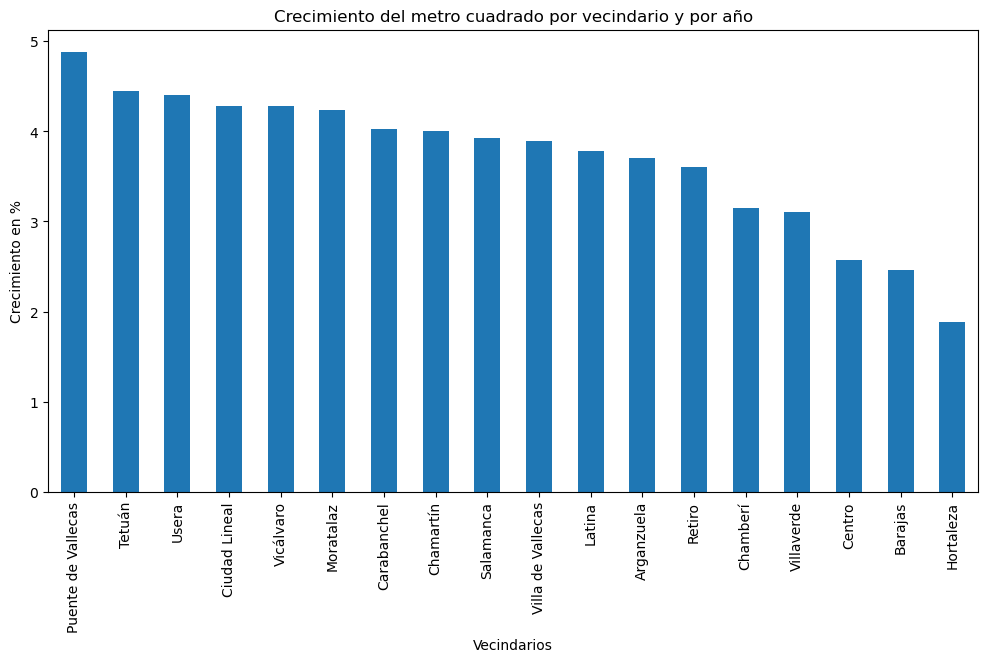

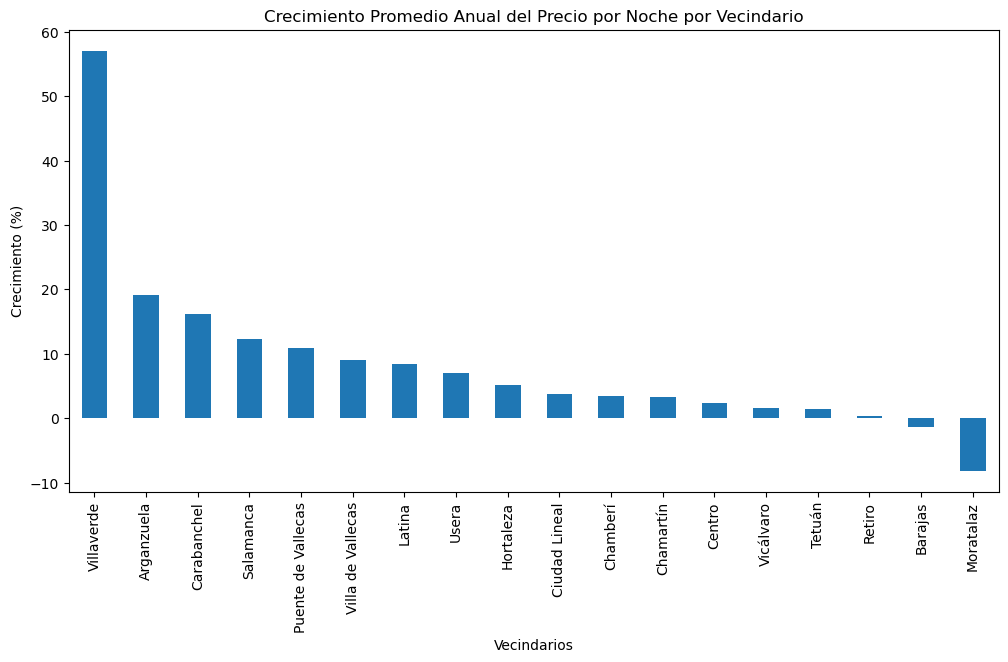

In [46]:
plt.figure(figsize=(12, 6))

# Crecimiento en m2_price
top_crecimiento_precio_m2.plot(kind='bar')
plt.title('Crecimiento del metro cuadrado por vecindario y por año')
plt.ylabel('Crecimiento en %')
plt.xlabel('Vecindarios')
plt.xticks(rotation=90)
plt.show()

# Crecimiento en night_price
plt.figure(figsize=(12, 6))
top_night_price_growth.plot(kind='bar')
plt.title('Crecimiento Promedio Anual del Precio por Noche por Vecindario')
plt.ylabel('Crecimiento (%)')
plt.xlabel('Vecindarios')
plt.xticks(rotation=90)
plt.show()


Puente de Vallecas, Tetuan y Usera lideran el crecimiento anual del precio del metro cuadrado, que se puede deber a que aumenta la demanda en esas zonas porque tienen precios mas bajos que otros barrios y estan bien comunicados en transporte opublico con la ciudad. Hortaleza el que menos 

villaverde ha aumentado el cremiento por noche y esto se debe a que es un barrio periferico que ofrecen precios bajos cuando el centro esta saturado. 

6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)? esto se responde con la de correlacion de antes

Text(0, 0.5, 'Inflacion')

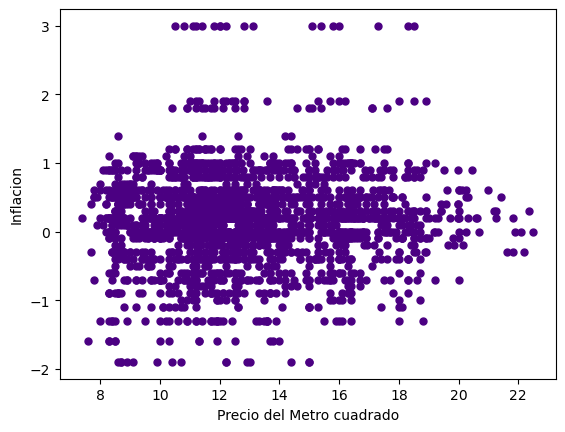

In [49]:

plt.scatter(df['m2_price'],df['inflation'], c = "indigo", marker = '.', s = 100 )


plt.xlabel("Precio del Metro cuadrado")
plt.ylabel("Inflacion")

Text(0, 0.5, 'Numero de anfitriones')

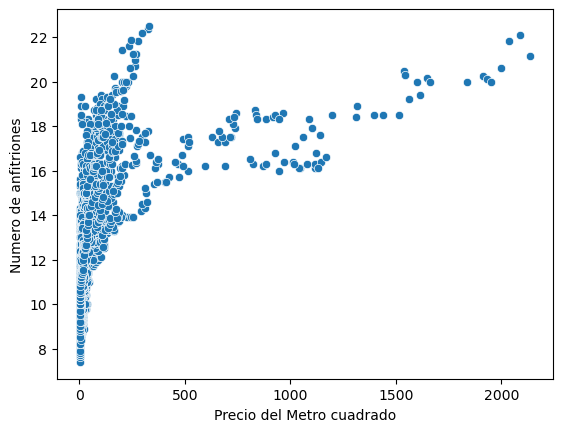

In [60]:
sns.scatterplot(x='hosts_count', y='m2_price', data=df)
plt.xlabel("Precio del Metro cuadrado")
plt.ylabel("Numero de anfitriones")

aqui si que se ve una correlacion positiva entre el numero de anfitriones y el precio del metro cuadrado

Text(0, 0.5, 'numero minimo de noches')

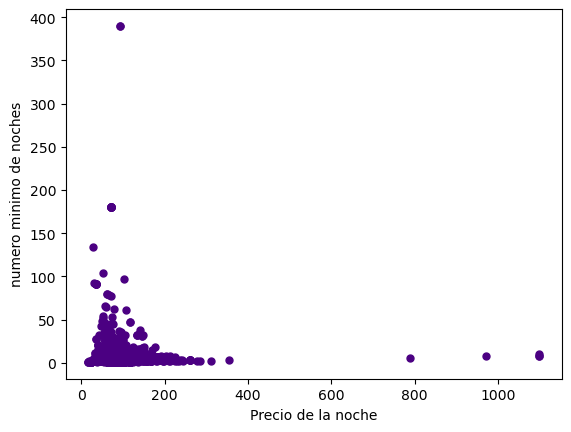

In [53]:
plt.scatter(df['nigth_price'],df['minimum_nights'], c = "indigo", marker = '.', s = 100 )


plt.xlabel("Precio de la noche")
plt.ylabel("numero minimo de noches")

aqui no se ve mucha relacion entre el numero de noches y el prcio de la noche. Algo, con varios outliers pero no interesa mucho para el dashboard

# 2. Modelo de Regresión Lineal

de acuerdo con la matriz de correlacion voy a incluir solo en el modeo aquellas que tengan mas de (mas-menos)0.35 de factor de correlacion

In [54]:

target = 'm2_price'
features = ['nigth_price', 'population_density', 'listings_count', 
            'hosts_count', 'Private_room', 'reviews_per_month', 'minimum_nights', 'listing_reviews', 'Entire_home']



Error cuadrático medio (MSE): 3.84
R² (Varianza explicada): 0.55


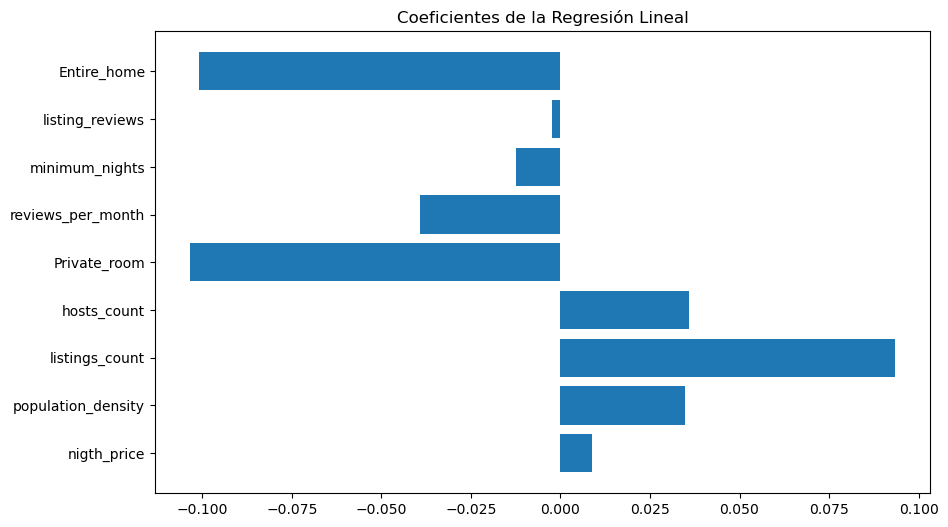

In [55]:
df_cleaned = df[features + [target]].dropna()
X = df_cleaned[features]
y = df_cleaned[target]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes y el intercepto
coefficients = pd.DataFrame({'Variable': features, 'Coeficiente': model.coef_})
intercept = model.intercept_

# Predicciones y evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"\nError cuadrático medio (MSE): {mse:.2f}")
print(f"R² (Varianza explicada): {r2:.2f}")
# importnacia de los predictores 
# Para regresión lineal (coeficientes)
plt.figure(figsize=(10,6))
plt.barh(X.columns, model.coef_)
plt.title('Coeficientes de la Regresión Lineal')
plt.show()

R^2 de 0.55 bastante bajo pero claramente indica que con los datos que tenemos, no es suficiente para explicar el precio del metro cuadrado

# Crear el Dashboard con los subplots

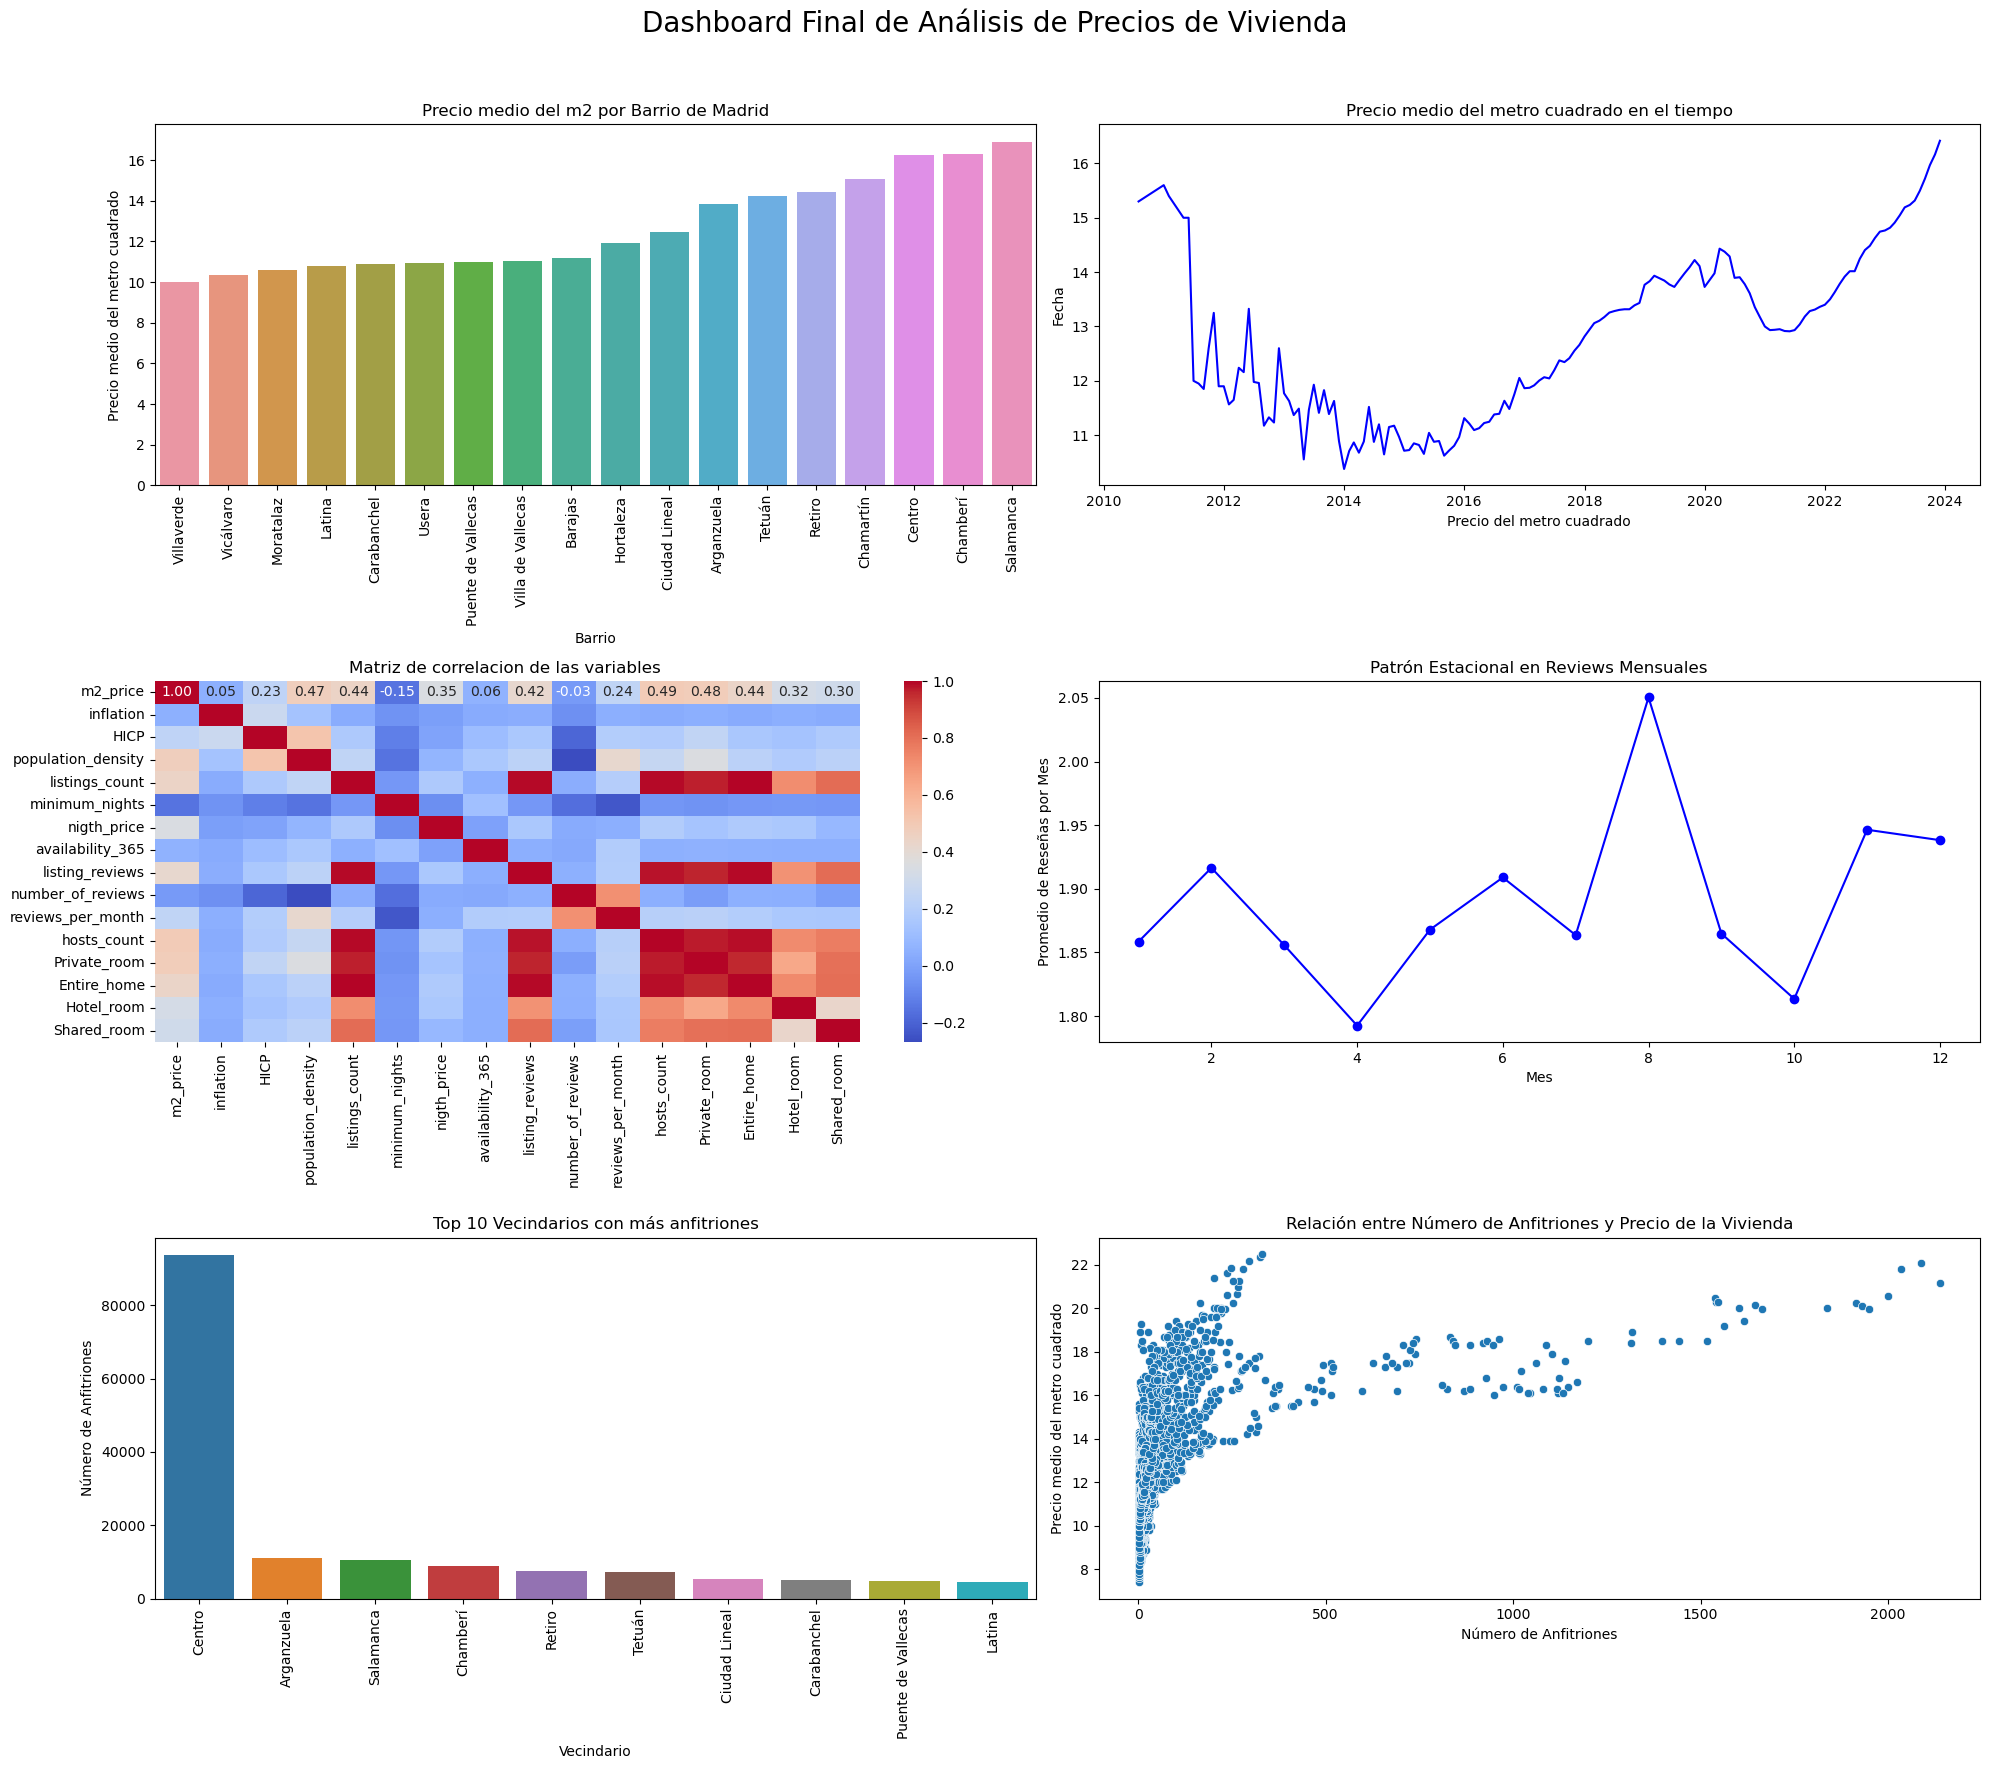

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Dashboard Final de Análisis de Precios de Vivienda', fontsize=20)

# Visualización 1: Precio medio del m2 por barrio
sns.barplot(x=avg_price_neighbourhood.index, y=avg_price_neighbourhood.values, ax=axes[0, 0])
axes[0, 0].set_title('Precio medio del m2 por Barrio de Madrid')
axes[0, 0].set_xlabel('Barrio')
axes[0, 0].set_ylabel('Precio medio del metro cuadrado')
axes[0, 0].tick_params(axis='x', rotation=90)


axes[0, 1].plot(avg_price_time.index, avg_price_time.values, color='blue')
axes[0, 1].set_title('Precio medio del metro cuadrado en el tiempo')
axes[0, 1].set_xlabel('Precio del metro cuadrado')
axes[0, 1].set_ylabel('Fecha')


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax = axes[1,0])
axes[1, 0].set_title('Matriz de correlacion de las variables ')

axes[1, 1].plot(monthly_reviews.index, monthly_reviews.values, marker='o', linestyle='-', color='blue')
axes[1, 1].set_title('Patrón Estacional en Reviews Mensuales')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Promedio de Reseñas por Mes')

sns.barplot(x=top_hosts.index, y=top_hosts.values, ax=axes[2, 0])
axes[2, 0].set_title('Top 10 Vecindarios con más anfitriones')
axes[2, 0].set_xlabel('Vecindario')
axes[2, 0].set_ylabel('Número de Anfitriones')
axes[2, 0].tick_params(axis='x', rotation=90)

sns.scatterplot(x='hosts_count', y='m2_price', data=df,  ax=axes[2, 1])
axes[2, 1].set_title('Relación entre Número de Anfitriones y Precio de la Vivienda')
axes[2, 1].set_xlabel('Número de Anfitriones')
axes[2, 1].set_ylabel('Precio medio del metro cuadrado')


# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()